# Introduction to Data Visualization with Matplotlib
Run the hidden code cell below to import the data used in this course.

In [41]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the course datasets 
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=["date"], index_col="date")
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('datasets/summer2016.csv')
austin_weather = pd.read_csv("datasets/austin_weather.csv", index_col="DATE")
weather = pd.read_csv("datasets/seattle_weather.csv", index_col="DATE")

# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"] 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- Using `austin_weather` and `seattle_weather`, create a Figure with an array of two Axes objects that share a y-axis range (`MONTHS` in this case). Plot Seattle's and Austin's `MLY-TAVG-NORMAL` (for average temperature) in the top Axes and plot their `MLY-PRCP-NORMAL` (for average precipitation) in the bottom axes. The cities should have different colors and the line style should be different between precipitation and temperature. Make sure to label your viz!
- Using `climate_change`, create a twin Axes object with the shared x-axis as time. There should be two lines of different colors not sharing a y-axis: `co2` and `relative_temp`. Only include dates from the 2000s and annotate the first date at which `co2` exceeded 400.
- Create a scatter plot from `medals` comparing the number of Gold medals vs the number of Silver medals with each point labeled with the country name.
- Explore if the distribution of `Age` varies in different sports by creating histograms from `summer_2016`. 
- Try out [the different Matplotlib styles available](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) and save your visualizations as a PNG file.

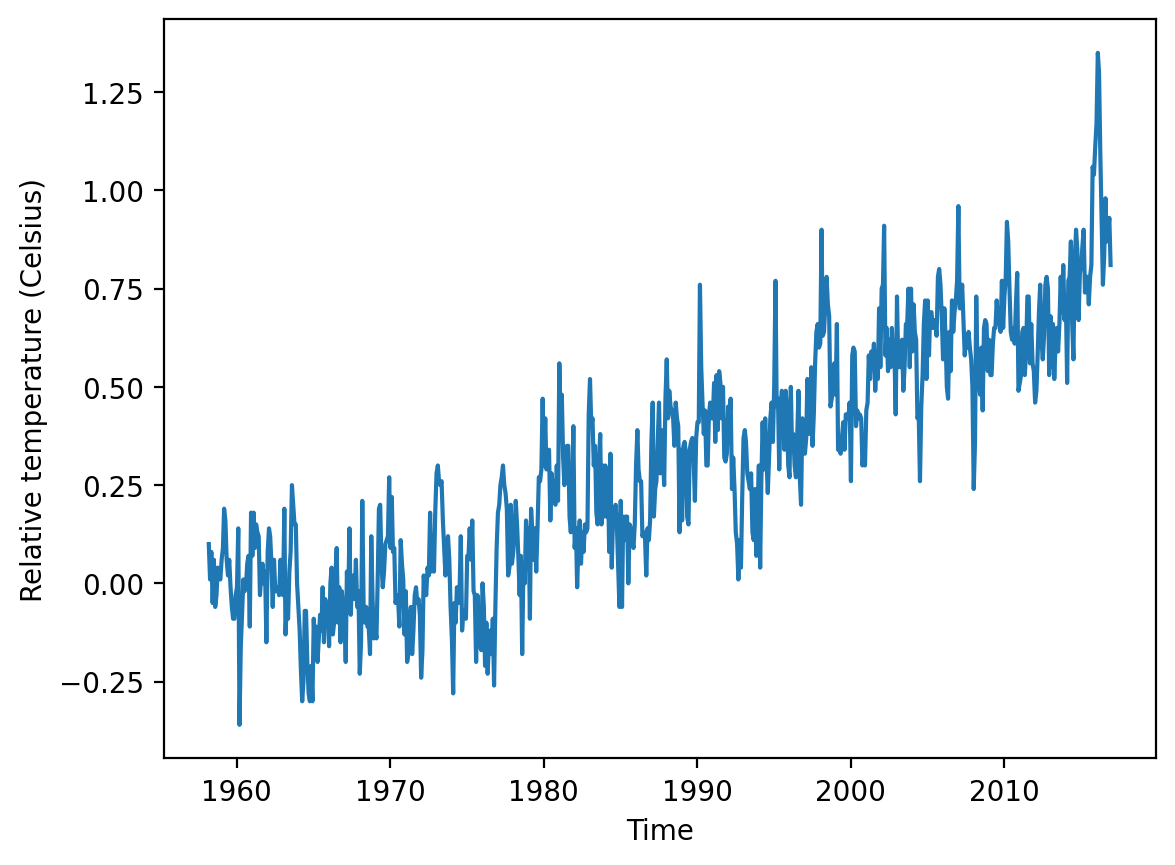

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(climate_change.index, climate_change['relative_temp'])  # Add the time-series for "relative_temp" to the plot
ax.set_xlabel('Time')  # Set the x-axis label
ax.set_ylabel('Relative temperature (Celsius)')  # Set the y-axis label
plt.show()  # Show the figure

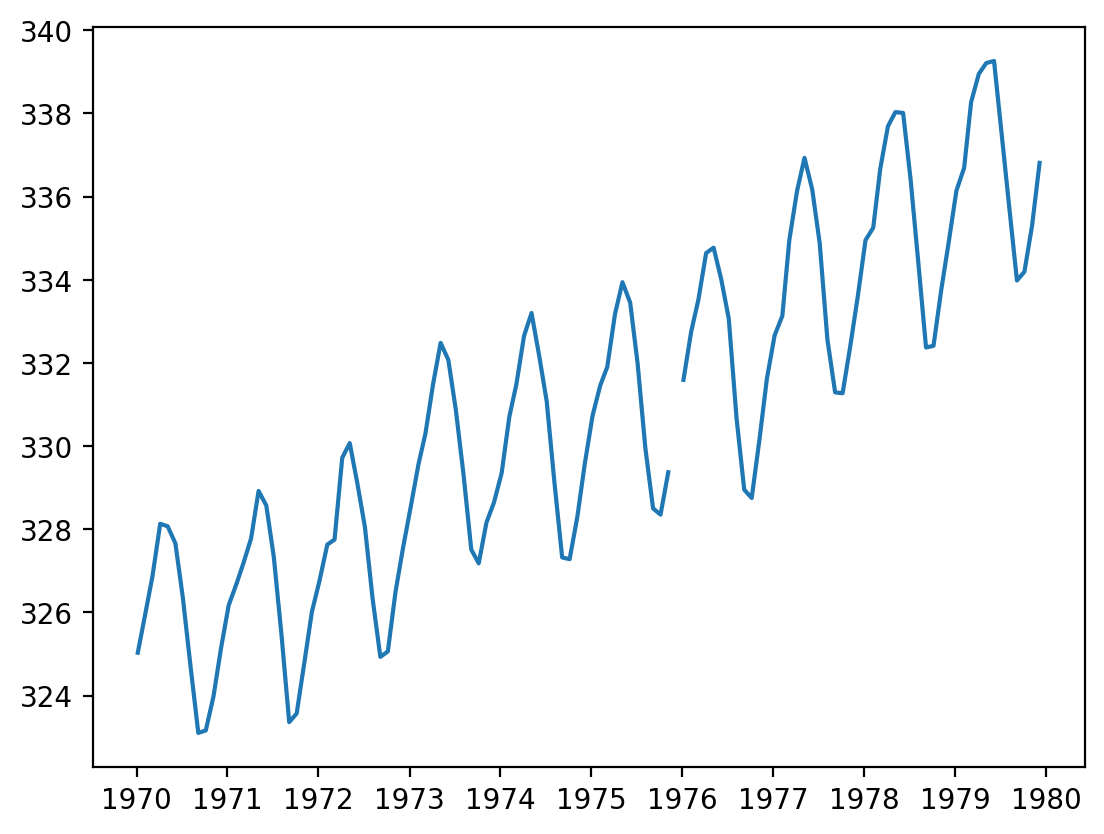

In [43]:
# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

===>Using climate_change, create a twin Axes object with the shared x-axis as time. There should be two lines of different colors not sharing a y-axis: co2 and relative_temp. Only include dates from the 2000s and annotate the first date at which co2 exceeded 400.

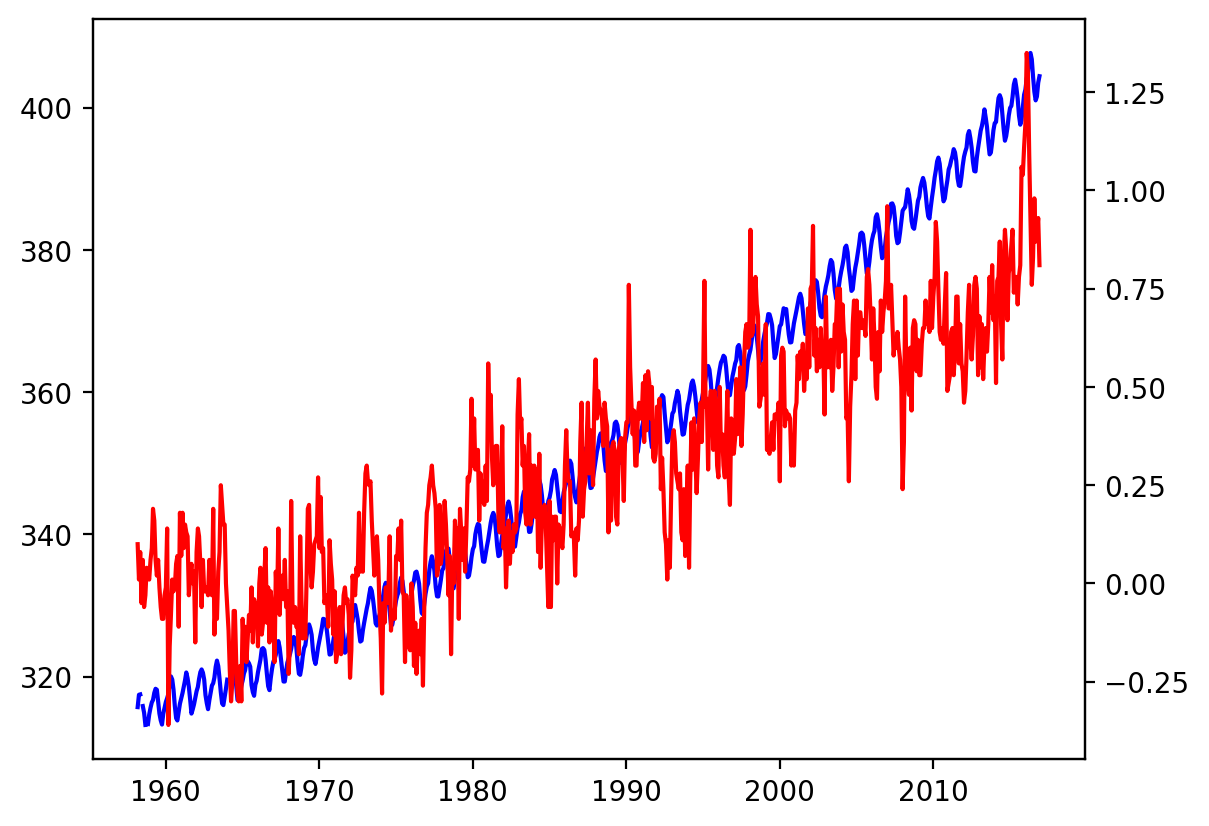

In [44]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig,ax=plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()

Defining a function that plots time-series data
Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels

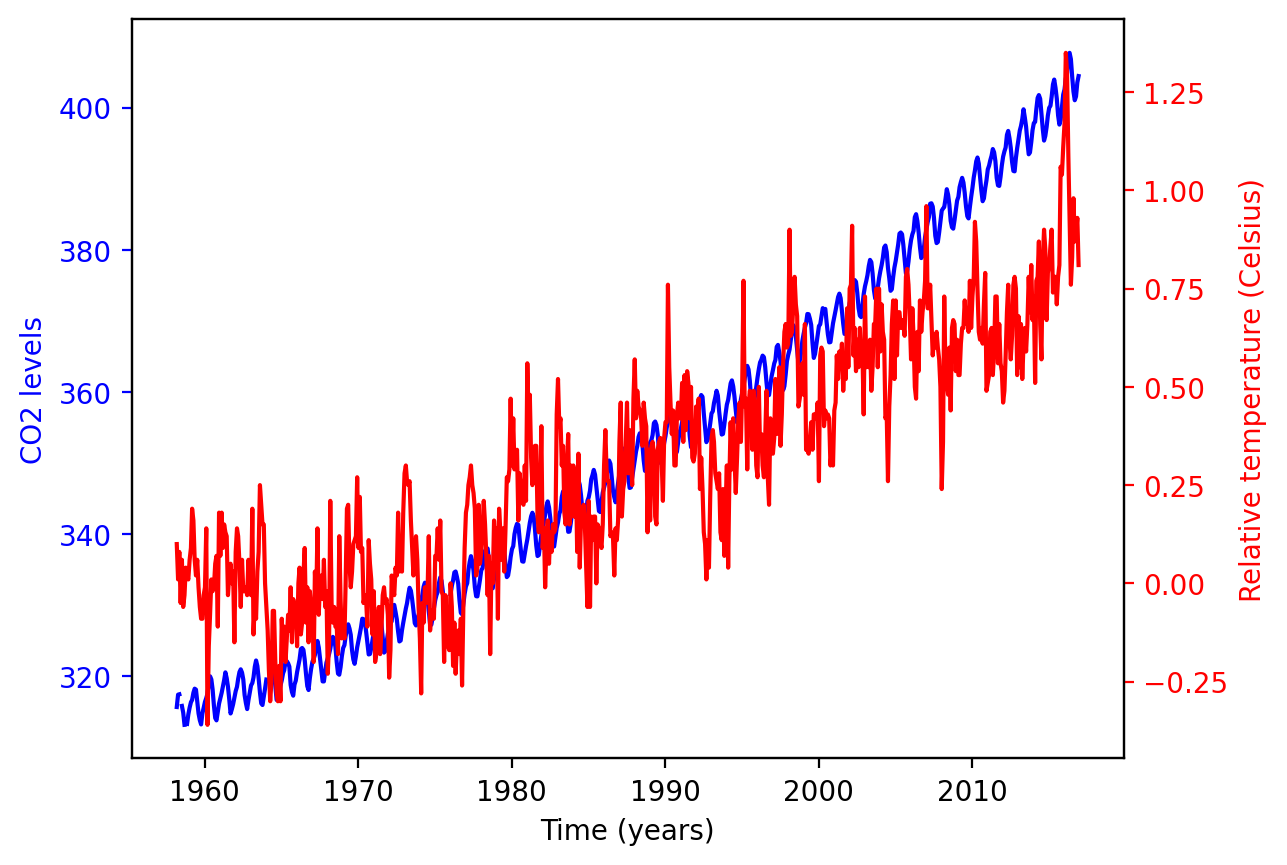

In [45]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

# Use this function to plot the climate_change time-series data, provided as a pandas DataFrame object that has a DateTimeIndex with the dates of the measurements and co2 and relative_temp columns.

fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)','CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)','Relative temperature (Celsius)')

plt.show()

# **Annotating a plot of time-series data:**
Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

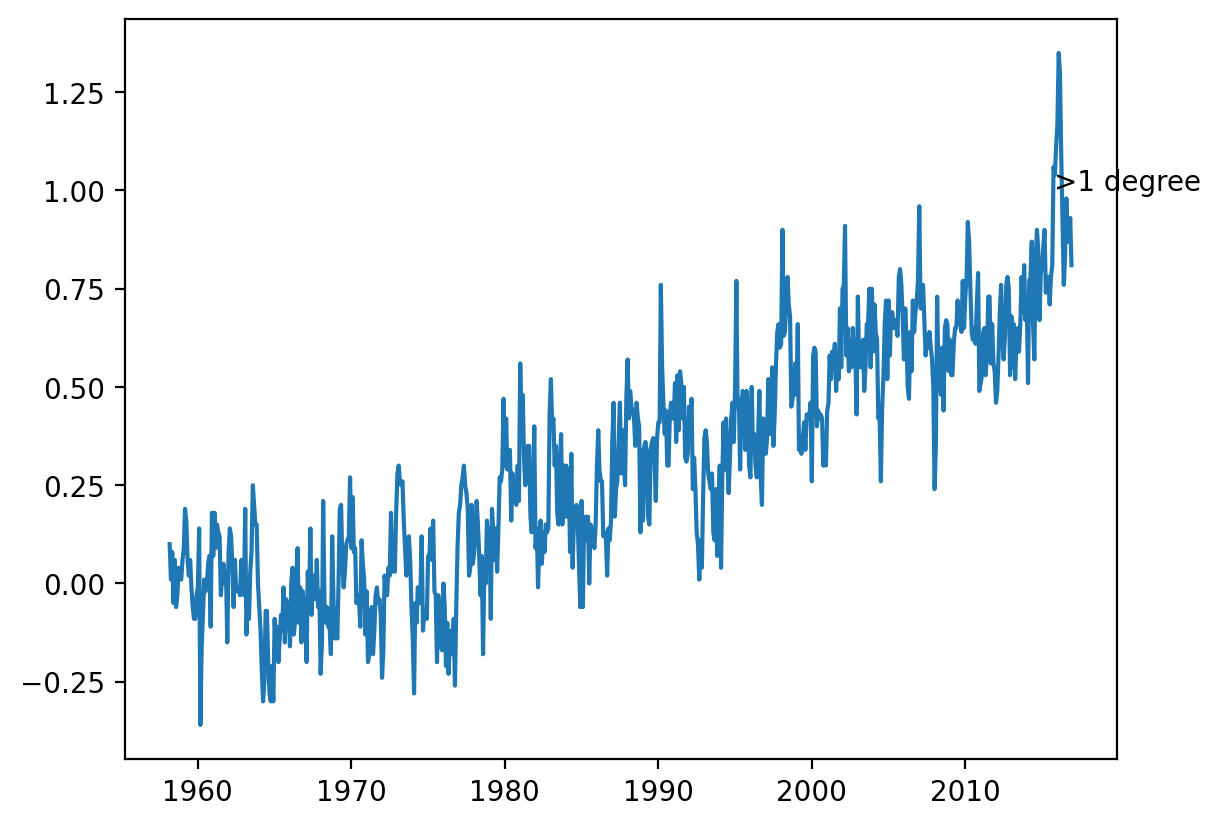

In [46]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index,climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', (pd.Timestamp('2015-10-06'), 1))

plt.show()

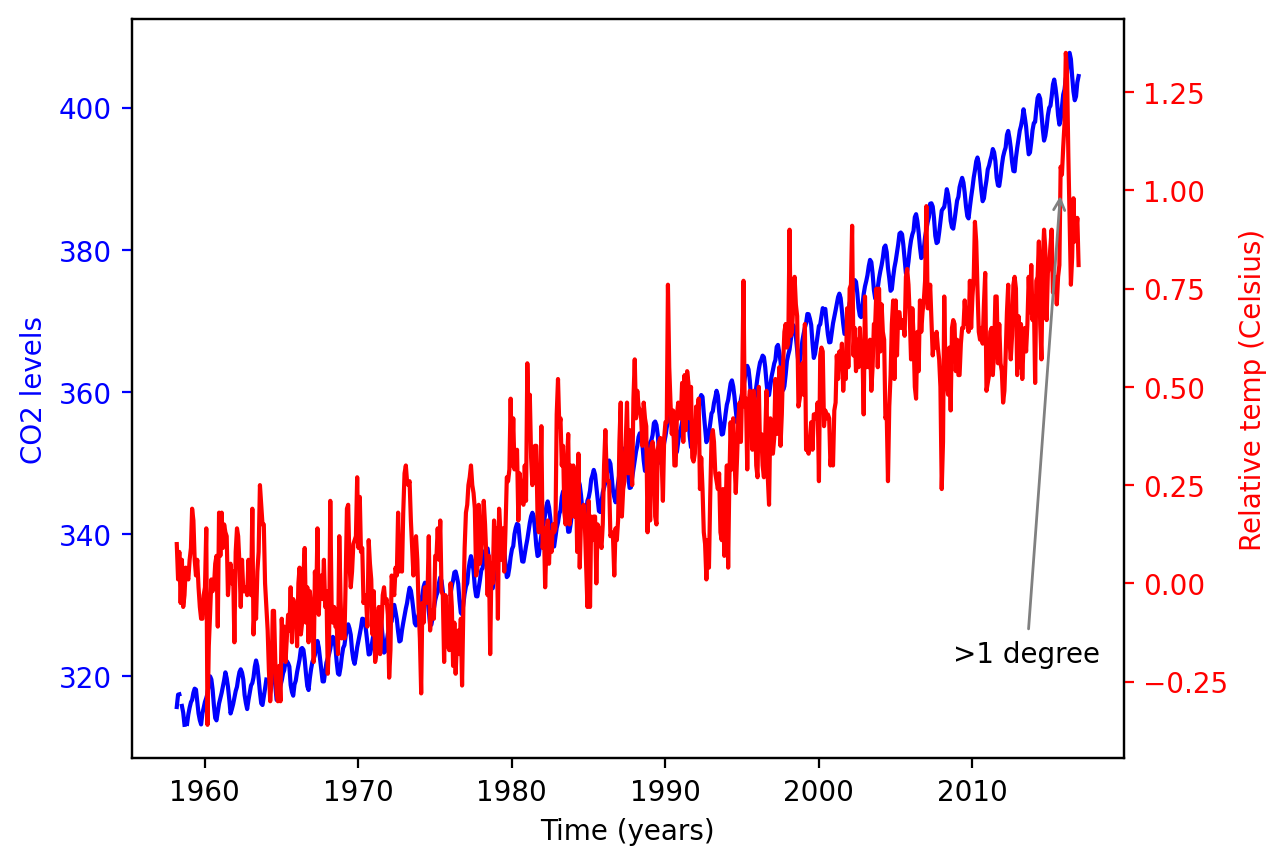

In [47]:
#Plotting time-series: putting it all together

fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the data
ax2.annotate('>1 degree', 
             xy=(pd.Timestamp('2015-10-06'), 1), 
             xytext=(pd.Timestamp('2008-10-06'), -0.2),
             arrowprops={'arrowstyle': '->', 'color': 'gray'})
plt.show()

# **chap3:**
Create a scatter plot from medals comparing the number of Gold medals vs the number of Silver medals with each point labeled with the country name.
## 1/Bar chart:
Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

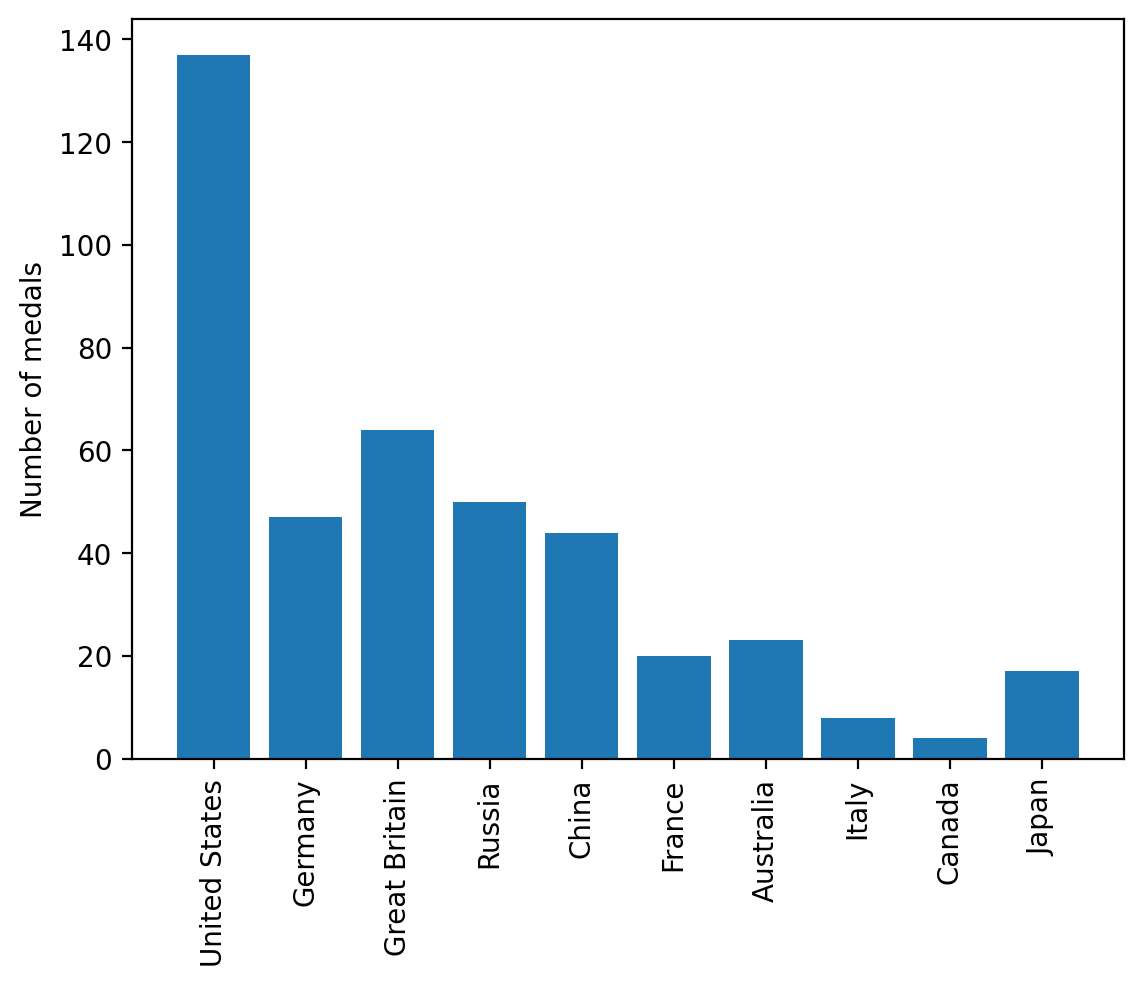

In [48]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index,medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

### **Stacked bar char:t**
A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

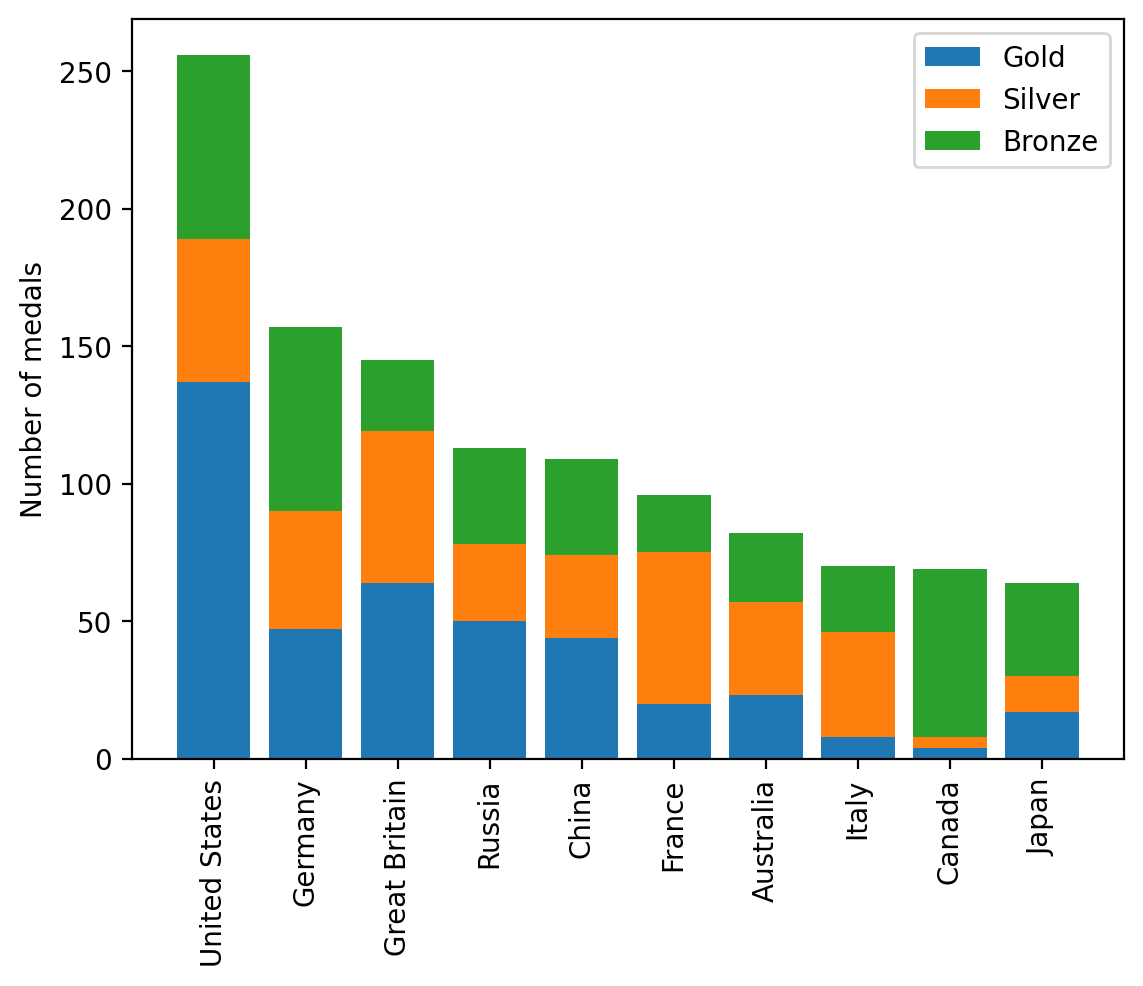

In [49]:
fig, ax = plt.subplots()
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'],label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold']+medals['Silver'], label='Bronze')

ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")
# Display the legend
ax.legend()

plt.show()
#save to use later
fig2,ax2=fig,ax

## **2/histograms:**
Histograms show the full distribution of a variable. In this exercise, we will display the distribution of weights of medalists in gymnastics and in rowing in the 2016 Olympic games for a comparison between them.

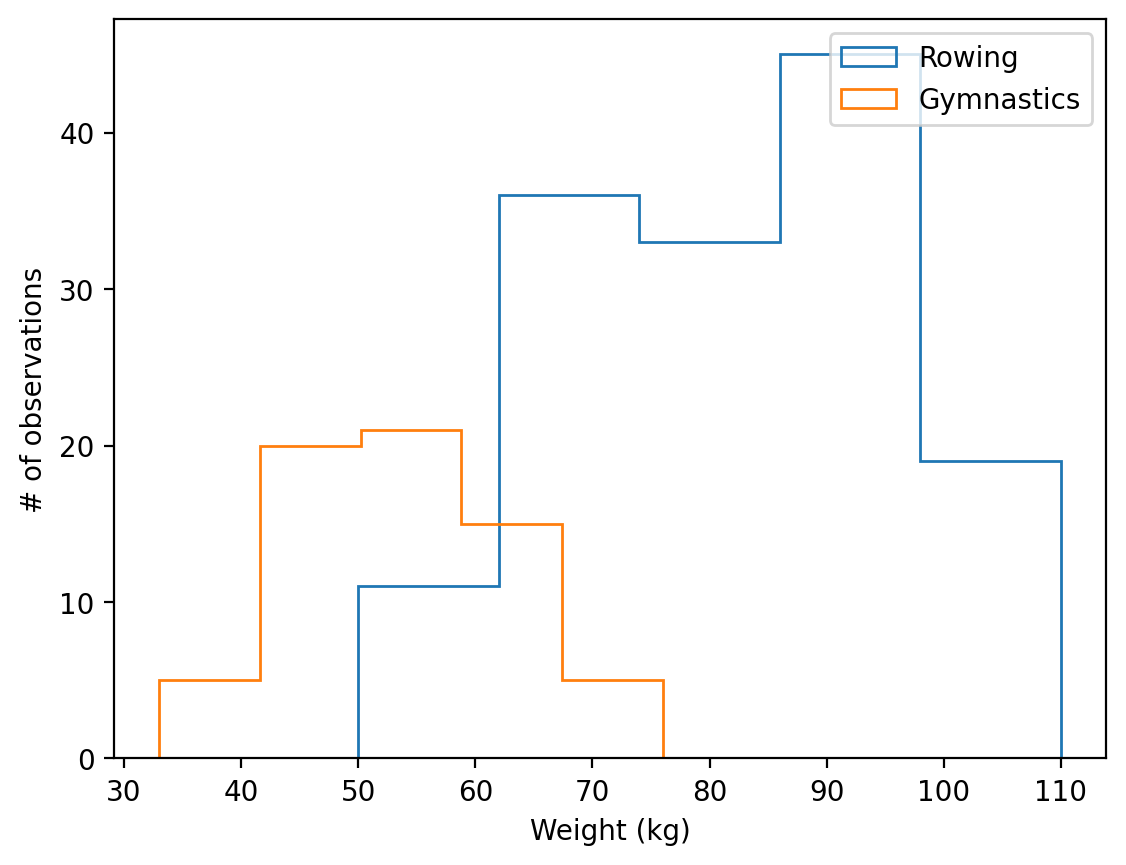

In [50]:

# Read the CSV data into a DataFrame
medals = pd.read_csv('datasets/summer2016.csv')
# Filter the DataFrame for mens_rowing and mens_gymnastics
mens_rowing = medals[medals['Sport'] == 'Rowing']
mens_gymnastics = medals[medals['Sport'] == 'Gymnastics']
# Display the dataframes
mens_rowing.head()
mens_gymnastics.head()



fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"],label="Rowing",histtype='step',bins=5)
# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"],label="Gymnastics",histtype='step',bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations",)

# Add the legend and show the Figure
ax.legend()
plt.show()


## 3/Adding error-bars to a bar chart:
Statistical plotting techniques add quantitative information for comparisons into the visualization.

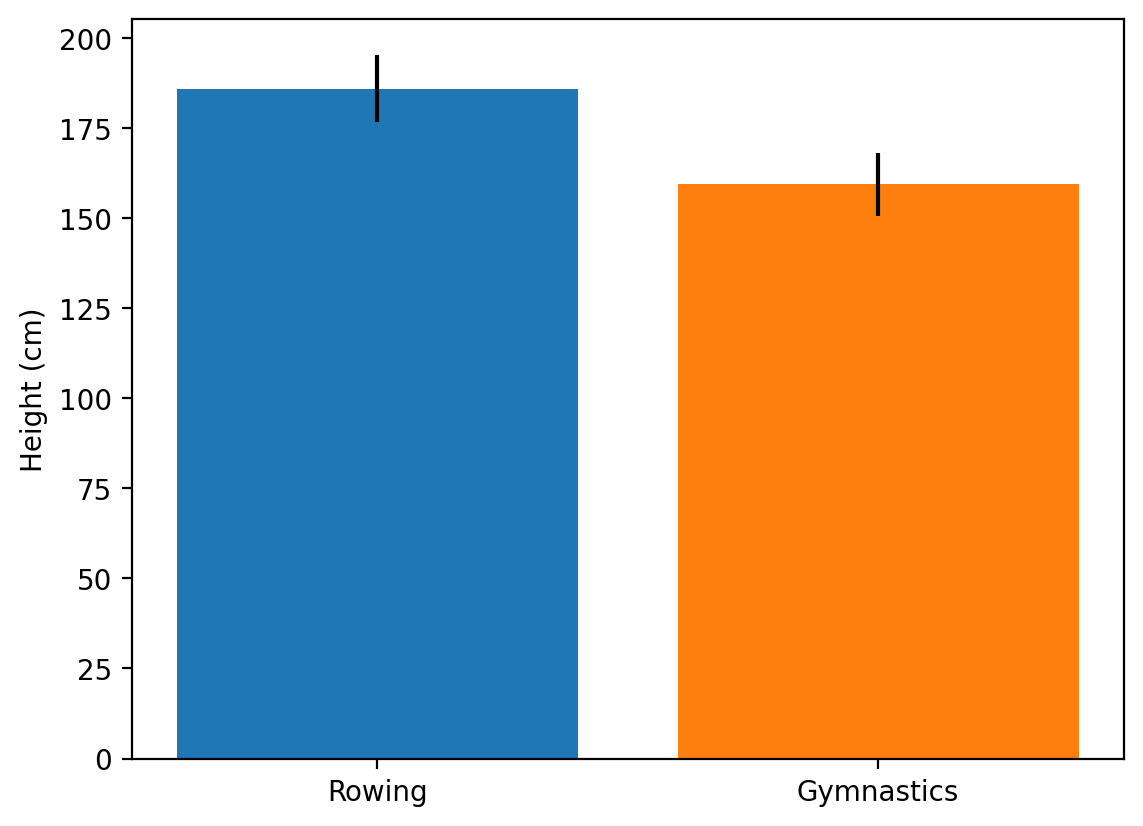

In [51]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

## **Adding error-bars to a plot:**
Adding error-bars to a plot is done by using the errorbar method of the Axes object.

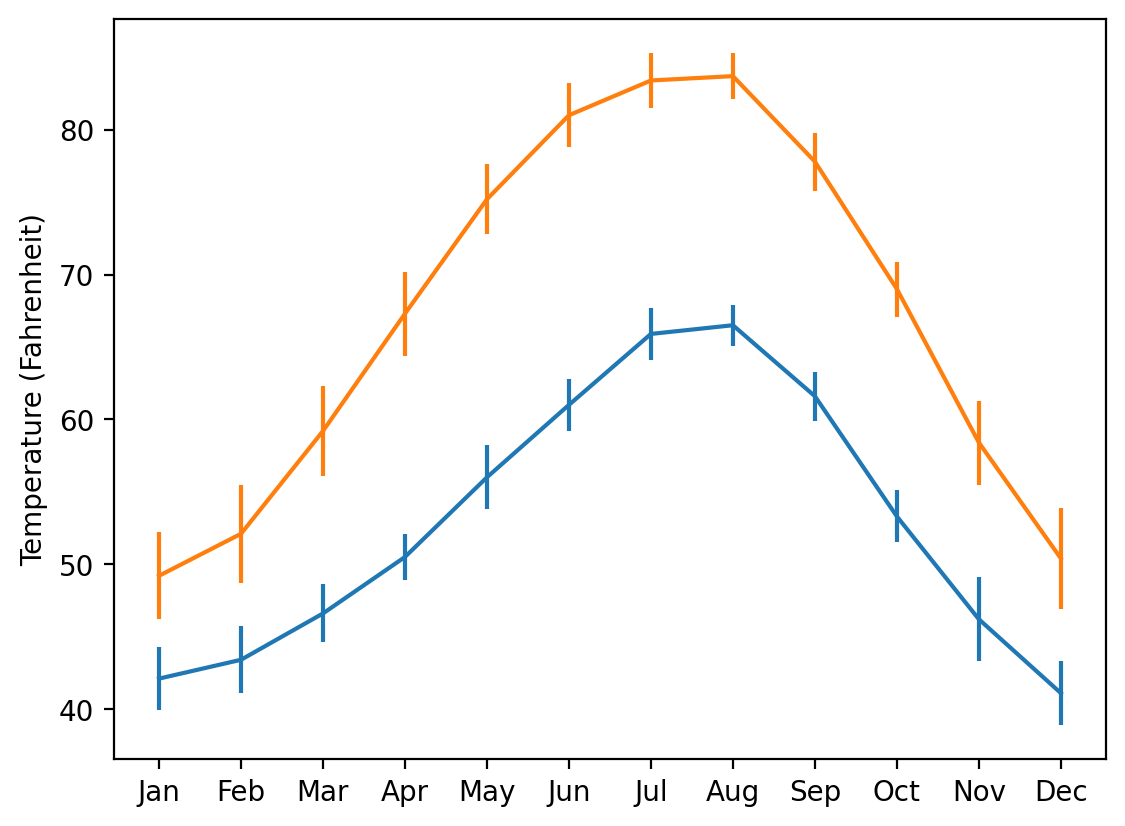

In [52]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"]) 

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

## **4/Creating boxplots:**
Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

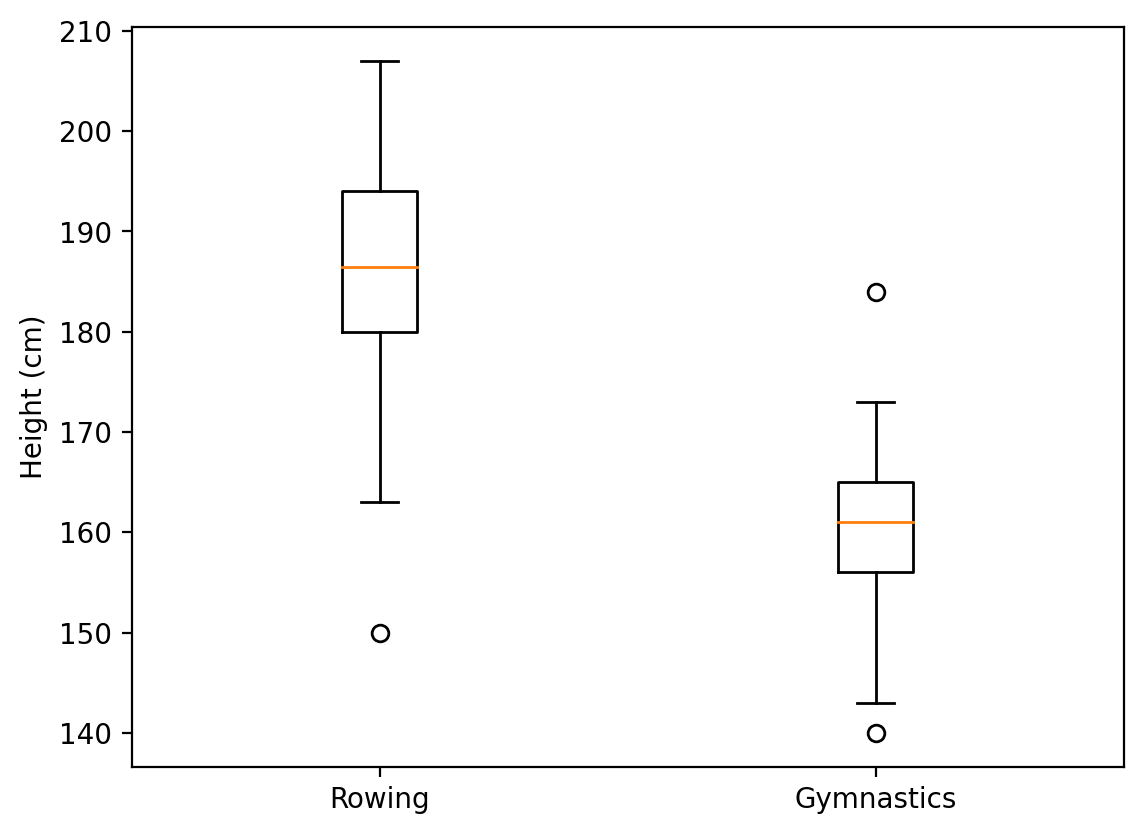

In [53]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"],mens_gymnastics["Height"]])
# Add x-axis tick labels:
ax.set_xticklabels(['Rowing','Gymnastics'])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

## **5/Simple scatter plot:**
Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis

*************************
The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the climate_change dataset, plotting a scatter plot of the "co2" column, on the x-axis, against the "relative_temp" column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

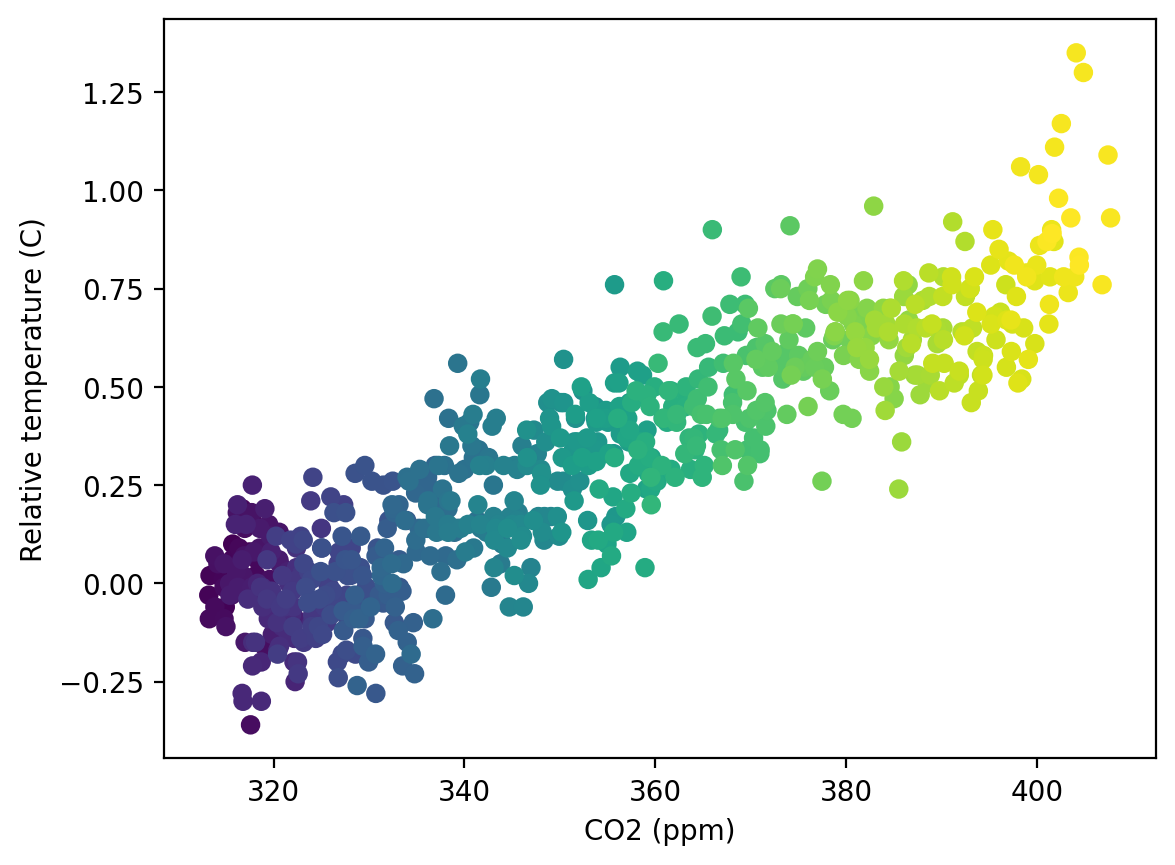

In [63]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'],climate_change["relative_temp"],c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()



# **chap4:**
Try out the different Matplotlib styles available and save your visualizations as a PNG file.

In [77]:
plt.style.use("seaborn-colorblind")
#to set the size of the figure:
fig.set_size_inches([5, 3])
#we can use quality (under 95)and dpi (dots per inch)
fig.savefig("exports/scatterplot2.png",dpi=300)




## **Unique values of a column:**
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In [70]:
# Extract the "Sport" column
sports_column = medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


**Automate your visualization:**

One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

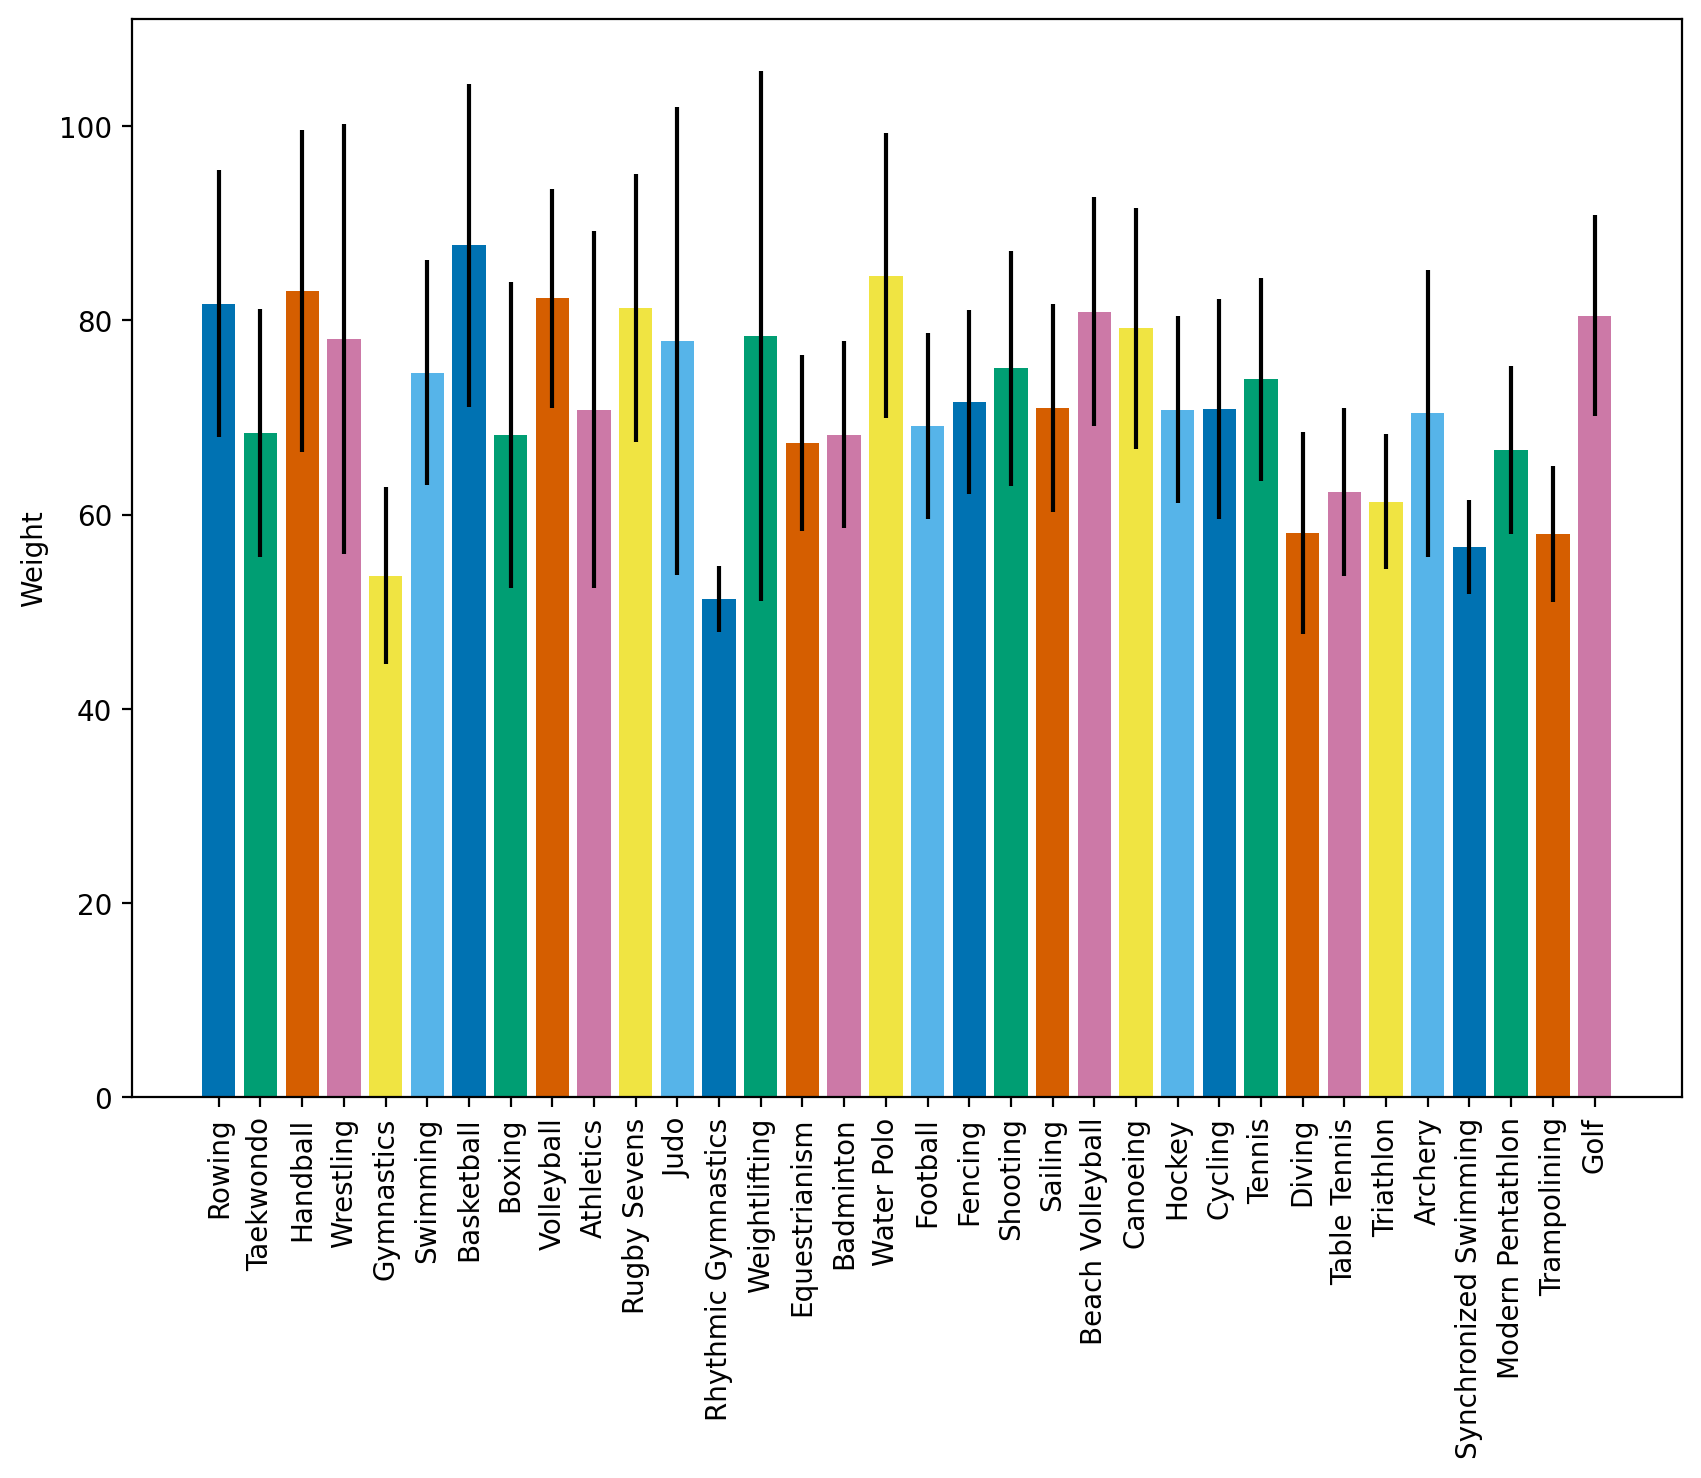

In [76]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = medals[medals['Sport']==sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport,sport_df["Weight"].mean(),yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.set_size_inches([10,7])
fig.savefig("exports/sports_weights.png")
plt.show()